In [71]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

In [72]:
NUM_OF_CLUSTERS = 3

In [73]:
df = pd.read_csv("./df_audio_features_10.csv", index_col=["song_name", "artist"])

df.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
song_name,artist,,,,,,,,,,,,,,,
My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
The Girl From Ipanema,Stan Getz,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
"Paint It, Black",The Rolling Stones,0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...


In [74]:
df= df.drop(["mode","key","duration_ms","time_signature", "id", "html"], axis = 1)
df.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_name,artist,,,,,,,,,
My Band,D12,0.851,0.849,-3.383,0.0828,0.4970,0.000002,0.1160,0.844,120.014
The Real Slim Shady,Eminem,0.949,0.661,-4.244,0.0572,0.0302,0.000000,0.0454,0.760,104.504
Águas De Março,Antônio Carlos Jobim,0.642,0.339,-15.503,0.1400,0.8540,0.000000,0.1050,0.491,143.418
The Girl From Ipanema,Stan Getz,0.641,0.140,-16.790,0.0390,0.8670,0.001660,0.1050,0.388,129.318
"Paint It, Black",The Rolling Stones,0.464,0.795,-9.267,0.0926,0.0493,0.002440,0.3990,0.612,158.691


In [75]:
df.dropna(inplace= True)
df

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_name,artist,,,,,,,,,
My Band,D12,0.851,0.84900,-3.383,0.0828,0.49700,0.000002,0.1160,0.8440,120.014
The Real Slim Shady,Eminem,0.949,0.66100,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,-15.503,0.1400,0.85400,0.000000,0.1050,0.4910,143.418
The Girl From Ipanema,Stan Getz,0.641,0.14000,-16.790,0.0390,0.86700,0.001660,0.1050,0.3880,129.318
"Paint It, Black",The Rolling Stones,0.464,0.79500,-9.267,0.0926,0.04930,0.002440,0.3990,0.6120,158.691
Sultans Of Swing,Dire Straits,0.733,0.79400,-10.023,0.0307,0.06140,0.036700,0.3300,0.9310,148.174
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,-10.865,0.1080,0.00314,0.867000,0.1110,0.0598,131.997
In Silence,Amelie Lens,0.736,0.84500,-12.017,0.0377,0.00548,0.901000,0.1110,0.1980,128.009
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,-33.503,0.0519,0.98900,0.596000,0.1040,0.2110,61.541


<AxesSubplot: >

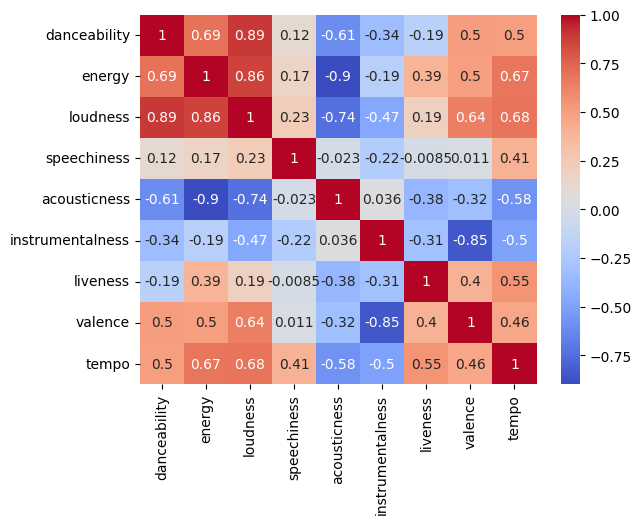

In [76]:
sns.heatmap(df.corr(), cmap = "coolwarm",annot=True)

plotting the data

Text(0, 0.5, 'loudness')

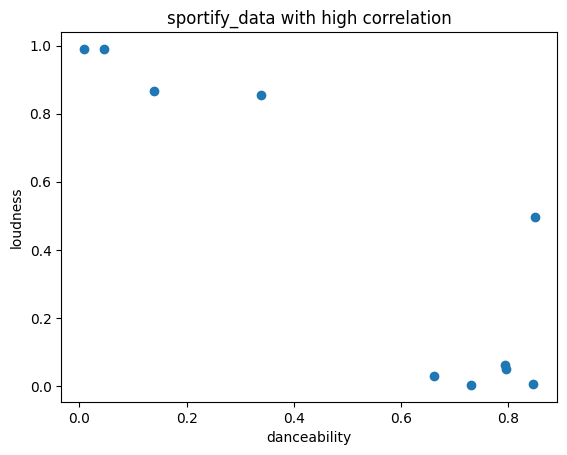

In [79]:
plt.title("sportify_data with high correlation")
plt.scatter(df["energy"],df["acousticness"])
plt.xlabel("energy")
plt.ylabel("acousticness")


Scaling

In [43]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(df)

scaled_df = scaler.transform(df)


In [44]:
# 5. reconvert the transformed data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df,
             index=df.index,
             columns=df.columns)

In [45]:
scaled_df.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_name,artist,,,,,,,,,
My Band,D12,0.871895,1.000000,1.000000,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076
The Real Slim Shady,Eminem,1.000000,0.776369,0.971414,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503
Águas De Março,Antônio Carlos Jobim,0.598693,0.393341,0.597610,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866
The Girl From Ipanema,Stan Getz,0.597386,0.156625,0.554880,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799
"Paint It, Black",The Rolling Stones,0.366013,0.935766,0.804648,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000


create the model

In [46]:
km_model = KMeans(n_clusters= NUM_OF_CLUSTERS)

training the model

In [47]:
y_predicted = km_model.fit_predict( df[[ "danceability", "loudness"]])
y_predicted

array([2, 2, 0, 0, 0, 0, 0, 0, 1, 1])

add the clusters to the main data frame

In [48]:
df["cluster"] = y_predicted
df.head(10)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_name,artist,,,,,,,,,,
My Band,D12,0.851,0.84900,-3.383,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,2
The Real Slim Shady,Eminem,0.949,0.66100,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,2
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,-15.503,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,0
The Girl From Ipanema,Stan Getz,0.641,0.14000,-16.790,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,0
"Paint It, Black",The Rolling Stones,0.464,0.79500,-9.267,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,0
Sultans Of Swing,Dire Straits,0.733,0.79400,-10.023,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,0
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,-10.865,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,0
In Silence,Amelie Lens,0.736,0.84500,-12.017,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,-33.503,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,1


In [49]:
df.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_name,artist,,,,,,,,,,
My Band,D12,0.851,0.849,-3.383,0.0828,0.4970,0.000002,0.1160,0.844,120.014,2
The Real Slim Shady,Eminem,0.949,0.661,-4.244,0.0572,0.0302,0.000000,0.0454,0.760,104.504,2
Águas De Março,Antônio Carlos Jobim,0.642,0.339,-15.503,0.1400,0.8540,0.000000,0.1050,0.491,143.418,0
The Girl From Ipanema,Stan Getz,0.641,0.140,-16.790,0.0390,0.8670,0.001660,0.1050,0.388,129.318,0
"Paint It, Black",The Rolling Stones,0.464,0.795,-9.267,0.0926,0.0493,0.002440,0.3990,0.612,158.691,0


split the rows based on clusters

In [50]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

cluster centers

In [51]:
km_model.cluster_centers_

array([[  0.66083333, -12.41083333],
       [  0.2855    , -29.1005    ],
       [  0.9       ,  -3.8135    ]])

plot the clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


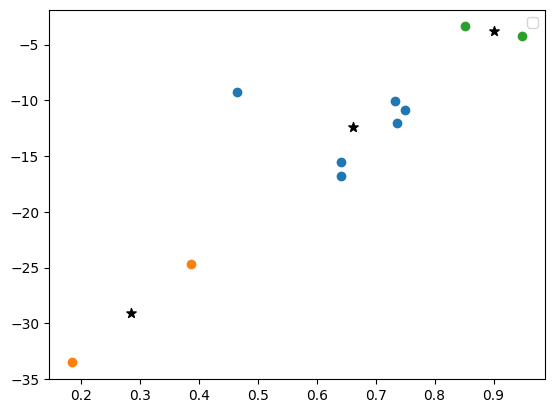

In [52]:
plt.scatter(  df1["danceability"], df1["loudness"] )
plt.scatter(  df2["danceability"], df2["loudness"] )
plt.scatter(  df3["danceability"], df3["loudness"] )


with_high_corr = plt.scatter( km_model.cluster_centers_[:,0] ,  # x-values
             km_model.cluster_centers_[:,1] ,  # y-values
             color ="black",
             marker = "*"  ,
             s = 50         
)


plt.legend()

Elbow method

In [53]:
inertia_list = [] # List of Inertias
silhoutte_score_list = [] # List of Silh. scores


k_range = range(2, 10)

# k: is the number of clusters
for k in k_range: #[2, 3, 4, 5, ---, 9]

    # Create a new K-Mean model with some certain number of clusters
    km_model = KMeans(n_clusters = k)


    # Train the model
    km_model.fit(df[["danceability", "loudness"]])  # caluclate the centriods of the clusters

    # Get the interial of the model and store it into the list
    inertia_list.append(km_model.inertia_)

    # Store the silhuotte scores
    s_score = silhouette_score(  df[["danceability", "loudness"]],   km_model.labels_   )
    silhoutte_score_list.append(s_score) 

plot the intetias

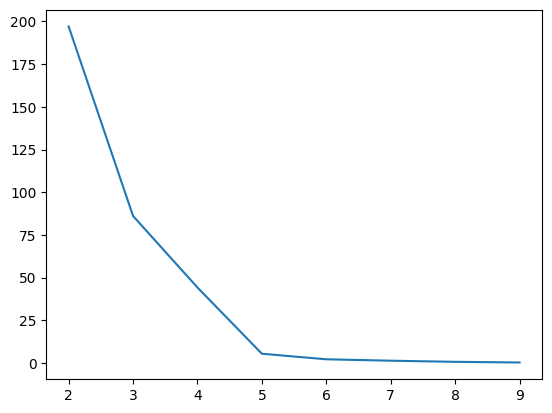

In [54]:
plt.plot(k_range, inertia_list)

plot the silhoutte score

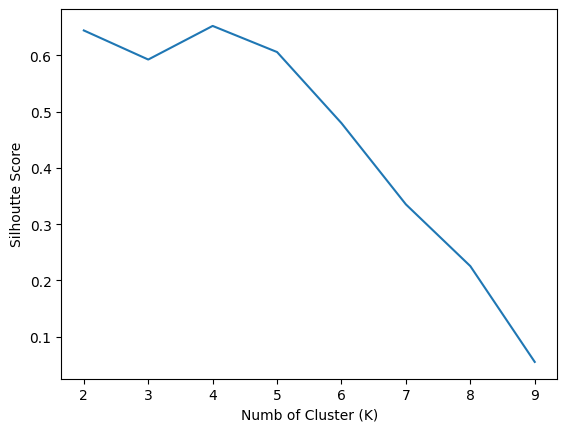

In [55]:
plt.xlabel("Numb of Cluster (K)")
plt.ylabel("Silhoutte Score")
plt.plot(k_range, silhoutte_score_list)

DBscan

In [56]:
dbscan_model  = DBSCAN(eps = 0.3 , min_samples = 3) # epsilon: is the raduis

y_predicted = dbscan_model.fit_predict(df[["danceability", "loudness"]])

y_predicted

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

adding lable 

In [57]:
df["cluster"] = y_predicted

In [58]:
df.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_name,artist,,,,,,,,,,
My Band,D12,0.851,0.849,-3.383,0.0828,0.4970,0.000002,0.1160,0.844,120.014,-1
The Real Slim Shady,Eminem,0.949,0.661,-4.244,0.0572,0.0302,0.000000,0.0454,0.760,104.504,-1
Águas De Março,Antônio Carlos Jobim,0.642,0.339,-15.503,0.1400,0.8540,0.000000,0.1050,0.491,143.418,-1
The Girl From Ipanema,Stan Getz,0.641,0.140,-16.790,0.0390,0.8670,0.001660,0.1050,0.388,129.318,-1
"Paint It, Black",The Rolling Stones,0.464,0.795,-9.267,0.0926,0.0493,0.002440,0.3990,0.612,158.691,-1


plot the cluster

In [59]:

#sns.scatterplot(df["danceability"], df["loudness"], hue = df["cluster"])

********************************************************************************************************

Text(0, 0.5, 'acousticness')

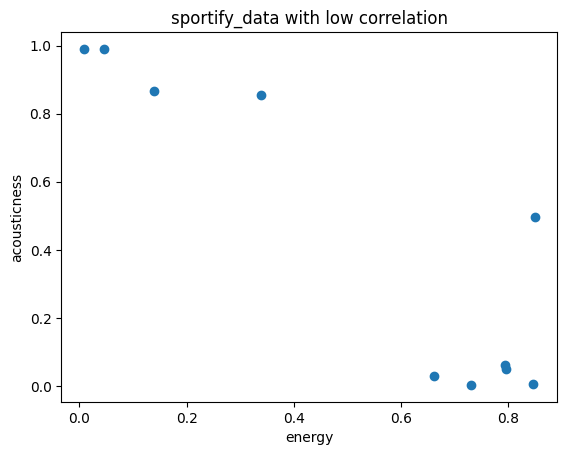

In [60]:
plt.title("sportify_data with low correlation")
plt.scatter(df["energy"],df["acousticness"])
plt.xlabel("energy")
plt.ylabel("acousticness")


scaling the data

In [61]:
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(df)

scaled_df = scaler.transform(df)


In [62]:
# 5. reconvert the transformed data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df,
             index=df.index,
             columns=df.columns)

create the model

In [63]:
km_model = KMeans(n_clusters= NUM_OF_CLUSTERS)

train the model

In [64]:
y_predicted = km_model.fit_predict( df[["energy", "acousticness"]])
y_predicted

array([2, 0, 1, 1, 0, 0, 0, 0, 1, 1])

add cluster to the main data frame

In [65]:
df["cluster"] = y_predicted
df.head(10)

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_name,artist,,,,,,,,,,
My Band,D12,0.851,0.84900,-3.383,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,2
The Real Slim Shady,Eminem,0.949,0.66100,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,0
Águas De Março,Antônio Carlos Jobim,0.642,0.33900,-15.503,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,1
The Girl From Ipanema,Stan Getz,0.641,0.14000,-16.790,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,1
"Paint It, Black",The Rolling Stones,0.464,0.79500,-9.267,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,0
Sultans Of Swing,Dire Straits,0.733,0.79400,-10.023,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,0
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,-10.865,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,0
In Silence,Amelie Lens,0.736,0.84500,-12.017,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.184,0.00833,-33.503,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,1


In [66]:
df.head()

,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
song_name,artist,,,,,,,,,,
My Band,D12,0.851,0.849,-3.383,0.0828,0.4970,0.000002,0.1160,0.844,120.014,2
The Real Slim Shady,Eminem,0.949,0.661,-4.244,0.0572,0.0302,0.000000,0.0454,0.760,104.504,0
Águas De Março,Antônio Carlos Jobim,0.642,0.339,-15.503,0.1400,0.8540,0.000000,0.1050,0.491,143.418,1
The Girl From Ipanema,Stan Getz,0.641,0.140,-16.790,0.0390,0.8670,0.001660,0.1050,0.388,129.318,1
"Paint It, Black",The Rolling Stones,0.464,0.795,-9.267,0.0926,0.0493,0.002440,0.3990,0.612,158.691,0


split the rows based on clusters

In [67]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

cluster centers

In [68]:
km_model.cluster_centers_

array([[0.7652   , 0.029904 ],
       [0.1331075, 0.925    ],
       [0.849    , 0.497    ]])

plot the clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


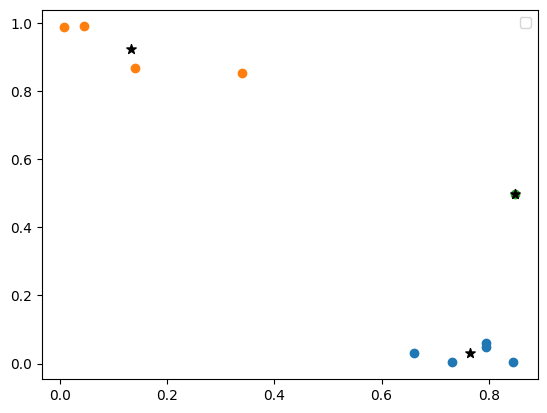

In [69]:
plt.scatter(  df1["energy"], df1["acousticness"] )
plt.scatter(  df2["energy"], df2["acousticness"] )
plt.scatter(  df3["energy"], df3["acousticness"] )


with_low_corr = plt.scatter( km_model.cluster_centers_[:,0] ,  # x-values
             km_model.cluster_centers_[:,1] ,  # y-values
             color ="black",
             marker = "*"  ,
             s = 50         
)


plt.legend()

compare the two plots

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

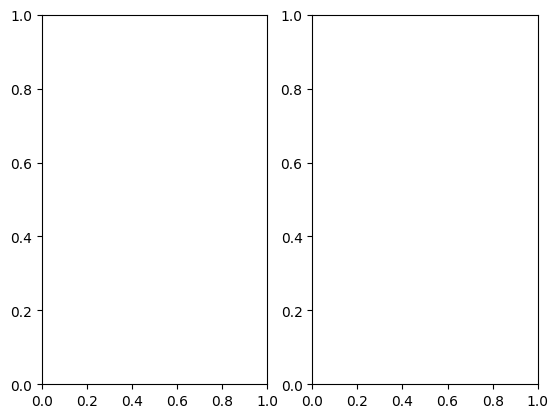

In [70]:
fig, ax = plt.subplots(1, 2)
  
  
# draw graph
ax[0, 0].plot(with_high_corr)
ax[0, 1].plot(with_low_corr)
